# Projeto Final - Redes Neurais

### Equipe

- Cynara Costa
- Caio Bezerra
- Clara Kenderessy
- Marcos André
- Pedro Queiroz

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error

# Step 1 | Importing Dataset

In [3]:
data = pd.read_csv("datasets/train.csv")

In [4]:
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Step 2 | Data Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
data.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [7]:
data = data.drop(columns=['Unnamed: 0', 'id'])

The column corresponding to the Arrival Delay in Minutes feature has 310 missing values.
Fill missing values with the median of the 'Arrival Delay in Minutes' column.

In [8]:
median_delay = data['Arrival Delay in Minutes'].median()


In [9]:
data['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)

/tmp/ipykernel_204725/392906894.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(median_delay, inplace=True)


In [10]:
data.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [11]:
data.shape

(103904, 23)

Now we need to transform the categorical columns in to numerical ones, with the label encoder from scikit-learn

In [12]:
label_encoder = LabelEncoder()
data['Customer Type'] = label_encoder.fit_transform(data['Customer Type'])
data['Type of Travel'] = label_encoder.fit_transform(data['Type of Travel'])
data['Class'] = label_encoder.fit_transform(data['Class'])

In [13]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


Also we need to transfom the gender, but with a map to be sure who is Male and who is Female

In [14]:
data['Gender'] = data['Gender'].map({'Female': 0, 'Male': 1})

In [15]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


And for the last column, the satisfaction we will do the same

In [16]:
data['satisfaction'] = data['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [17]:
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


# Step 3 | Data Visualization

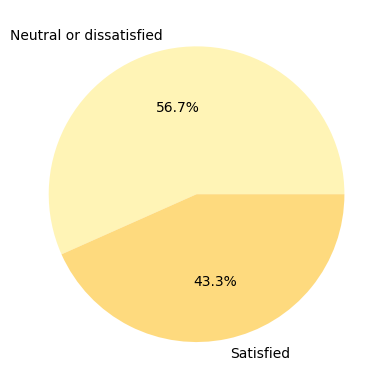

In [18]:
plt.pie(data.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
pass

Now we will see the correlation between our columns

In [19]:
corr_mat = data.corr()
corr_mat

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031732,0.008928,0.006909,-0.012870,0.005828,0.008974,0.009142,0.006951,0.000333,...,0.006117,0.008156,0.031798,0.037391,0.010563,0.039410,0.006505,0.002935,0.000347,0.012211
Customer Type,-0.031732,1.000000,-0.281674,-0.308333,0.042638,-0.225200,-0.007543,-0.206869,-0.019509,0.006078,...,-0.109930,-0.056560,-0.047868,0.024723,-0.032177,0.022670,-0.083613,0.004036,0.004815,-0.187638
Age,0.008928,-0.281674,1.000000,-0.048524,-0.117370,0.099461,0.017859,0.038125,0.024842,-0.001330,...,0.076444,0.057594,0.040583,-0.047529,0.035482,-0.049427,0.053611,-0.010152,-0.012105,0.137167
Type of Travel,0.006909,-0.308333,-0.048524,1.000000,0.487088,-0.267344,-0.105085,0.259763,-0.133511,-0.030700,...,-0.148199,-0.056543,-0.138803,-0.031321,0.016751,-0.022599,-0.079207,-0.005432,-0.005867,-0.449000
Class,-0.012870,0.042638,-0.117370,0.487088,1.000000,-0.427219,-0.023112,0.089922,-0.094329,-0.004488,...,-0.179028,-0.207748,-0.197321,-0.163998,-0.157112,-0.158604,-0.125988,0.010281,0.014554,-0.449321
Flight Distance,0.005828,-0.225200,0.099461,-0.267344,-0.427219,1.000000,0.007131,-0.020043,0.065717,0.004793,...,0.128740,0.109526,0.133916,0.063184,0.073072,0.057540,0.093149,0.002158,-0.002470,0.298780
Inflight wifi service,0.008974,-0.007543,0.017859,-0.105085,-0.023112,0.007131,1.000000,0.343845,0.715856,0.336248,...,0.209321,0.121500,0.160473,0.120923,0.043193,0.110441,0.132698,-0.017402,-0.019042,0.284245
Departure/Arrival time convenient,0.009142,-0.206869,0.038125,0.259763,0.089922,-0.020043,0.343845,1.000000,0.436961,0.444757,...,-0.004861,0.068882,0.012441,0.072126,0.093333,0.073318,0.014292,0.001005,-0.000918,-0.051601
Ease of Online booking,0.006951,-0.019509,0.024842,-0.133511,-0.094329,0.065717,0.715856,0.436961,1.000000,0.458655,...,0.047032,0.038833,0.107601,0.038762,0.011081,0.035272,0.016179,-0.006371,-0.007947,0.171705
Gate location,0.000333,0.006078,-0.001330,-0.030700,-0.004488,0.004793,0.336248,0.444757,0.458655,1.000000,...,0.003517,-0.028373,-0.005873,0.002313,-0.035427,0.001681,-0.003830,0.005467,0.005178,0.000682


<Axes: >

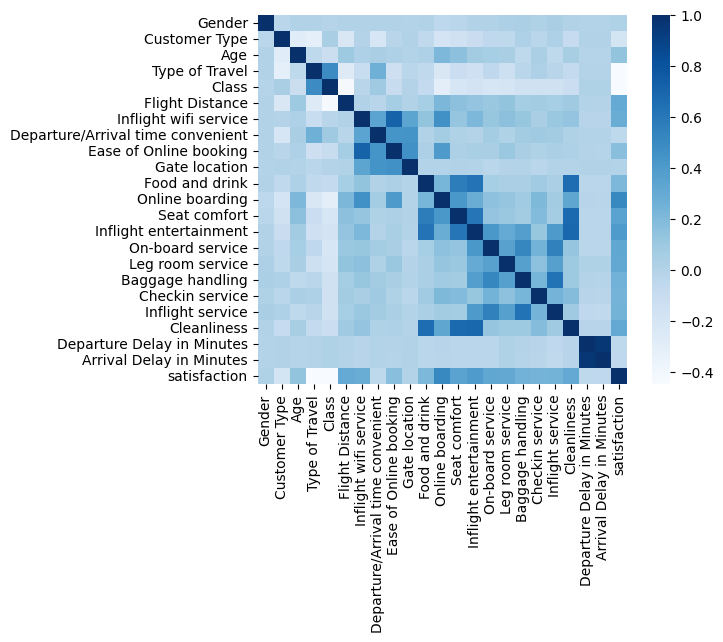

In [20]:
sns.heatmap(corr_mat, square = True, cmap = 'Blues')

# Step 4 | Spliting and Normalization

Converting the data to arrys instead of DF

In [21]:
X = data.drop(columns=['satisfaction'])
y = data['satisfaction']

In [22]:
## Train: 50%, Validation: 25%, Test: 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, 
                                                    random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=1/3, 
                                                  random_state=42, stratify=y_train)

In [23]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

## MLP


In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score


mlp = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

/home/pccql/facul/final-project-if702/.venv/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32, 16), random_state=42)

In [25]:
y_val_pred = mlp.predict(X_val)

val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(classification_report(y_val, y_val_pred))


Validation Accuracy: 95.00%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14720
           1       0.94      0.94      0.94     11256

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



In [26]:
y_test_pred = mlp.predict(X_test)

# Evaluate the model on test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(classification_report(y_test, y_test_pred))


Test Accuracy: 95.05%
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14720
           1       0.94      0.94      0.94     11256

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



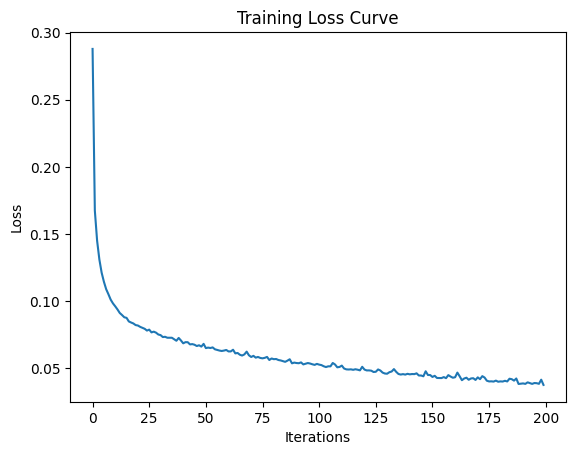

In [27]:
# Plot training loss curve
plt.plot(mlp.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

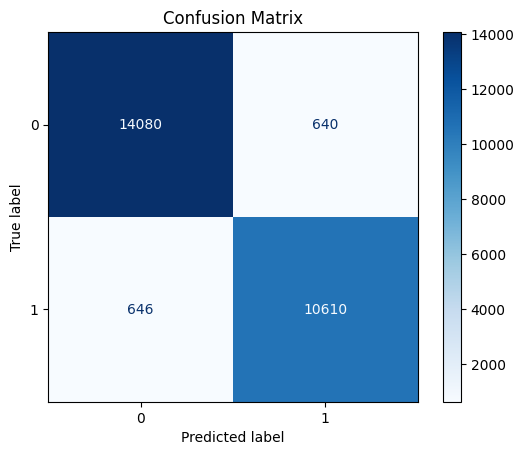

In [28]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

label_encoders = {}
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['satisfaction'].classes_)

# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [29]:
from scipy.stats import ks_2samp

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(y_test, y_test_pred)
print(f'KS Statistic: {ks_stat}')
print(f'KS P-Value: {ks_p_value}')

# Interpretation of the KS test
alpha = 0.05
if ks_p_value < alpha:
    print("The distributions of the predicted and actual labels are significantly different.")
else:
    print("The distributions of the predicted and actual labels are not significantly different.")


KS Statistic: 0.00023098244533414913
KS P-Value: 1.0
The distributions of the predicted and actual labels are not significantly different.


### Random Forest

Essa é a implementação inicial do Random Forest, com alguns parâmetros padrão sendo definidos e então os resultados obtidos.

In [30]:
# Parameters

n_estimators = 200 
max_depth = 30 
max_features = 'sqrt'
min_samples_leaf = 2 


# Training the model
rf_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=max_depth,
    max_features=max_features,
    min_samples_leaf=min_samples_leaf,
    random_state=42
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [31]:
# Evaluation metrics
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Accuracy Score:', accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14720
           1       0.97      0.94      0.95     11256

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Accuracy Score: 0.9588081305820758


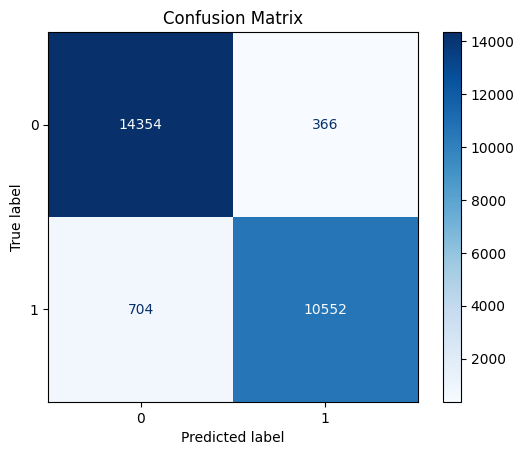

In [32]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

label_encoders = {}
for column in ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le


cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoders['satisfaction'].classes_)

# Plot confusion matrix
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [33]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error (MSE):', mse)

Mean Squared Error (MSE): 0.041191869417924236


In [34]:
y_proba = rf_model.predict_proba(X_test)[:, 1]
auroc = roc_auc_score(y_test, y_proba)
print('Area Under the Receiver Operating Characteristic Curve (AUROC):', auroc)

Area Under the Receiver Operating Characteristic Curve (AUROC): 0.9930693123087976


In [35]:
from scipy.stats import ks_2samp

# Perform the Kolmogorov-Smirnov test
ks_stat, ks_p_value = ks_2samp(y_test, y_pred)
print(f'KS Statistic: {ks_stat}')
print(f'KS P-Value: {ks_p_value}')

# Interpretation of the KS test
alpha = 0.05
if ks_p_value < alpha:
    print("The distributions of the predicted and actual labels are significantly different.")
else:
    print("The distributions of the predicted and actual labels are not significantly different.")


KS Statistic: 0.013012011087157327
KS P-Value: 0.024387619533591476
The distributions of the predicted and actual labels are significantly different.


### Tuning de hiperparâmetros (Optuna)

#### MLP

In [44]:
import optuna
from sklearn.pipeline import Pipeline


def objective_mlp(trial):
    n_layers = trial.suggest_int('n_layers', 1, 2)
    units = trial.suggest_int('units', 10, 100)
    activation = trial.suggest_categorical('activation', ['logistic', 'tanh', 'relu'])
    solver = trial.suggest_categorical('solver', ['adam', 'sgd',  'lbfgs'])
    max_iter = 10000
    early_stopping = True
    n_iter_no_change = trial.suggest_int('n_iter_no_change', 10, 20)

    hidden_layer_sizes = (units,) * n_layers

    model = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                          activation=activation,
                          solver=solver,
                          alpha=alpha,
                          max_iter=max_iter,
                          early_stopping=early_stopping,
                          n_iter_no_change=n_iter_no_change,
                          random_state=42)


    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred)
    return auroc

study_mlp = optuna.create_study(direction='maximize')
study_mlp.optimize(objective_mlp, n_trials=10)

print('Melhores hiperparâmetros MLP:', study_mlp.best_params)


[I 2024-07-29 18:57:14,902] A new study created in memory with name: no-name-e0deb535-7ced-4100-98cf-16762e6c93f0
[I 2024-07-29 18:57:25,426] Trial 0 finished with value: 0.9832896187250857 and parameters: {'n_layers': 1, 'units': 49, 'activation': 'relu', 'solver': 'sgd', 'n_iter_no_change': 12}. Best is trial 0 with value: 0.9832896187250857.
[I 2024-07-29 18:59:57,545] Trial 1 finished with value: 0.9894671664242838 and parameters: {'n_layers': 2, 'units': 92, 'activation': 'tanh', 'solver': 'lbfgs', 'n_iter_no_change': 17}. Best is trial 1 with value: 0.9894671664242838.
[I 2024-07-29 19:06:38,934] Trial 2 finished with value: 0.9858108465340224 and parameters: {'n_layers': 2, 'units': 36, 'activation': 'tanh', 'solver': 'lbfgs', 'n_iter_no_change': 12}. Best is trial 1 with value: 0.9894671664242838.
[I 2024-07-29 19:06:49,035] Trial 3 finished with value: 0.9884219599788324 and parameters: {'n_layers': 1, 'units': 20, 'activation': 'logistic', 'solver': 'adam', 'n_iter_no_change'

Melhores hiperparâmetros MLP: {'n_layers': 1, 'units': 24, 'activation': 'tanh', 'solver': 'lbfgs', 'n_iter_no_change': 10}


In [45]:
best_mlp = MLPClassifier(hidden_layer_sizes=(study_mlp.best_params['units'],) * study_mlp.best_params['n_layers'],
                         activation=study_mlp.best_params['activation'],
                         solver=study_mlp.best_params['solver'],
                         max_iter=10000,
                         early_stopping=True,
                         n_iter_no_change=study_mlp.best_params['n_iter_no_change'],
                         random_state=42)


best_mlp.fit(X_train, y_train)

y_val_pred = best_mlp.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(classification_report(y_val, y_val_pred))

y_test_pred = best_mlp.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 95.21%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14720
           1       0.95      0.94      0.94     11256

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976

Test Accuracy: 95.14%
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     14720
           1       0.95      0.94      0.94     11256

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976



#### Random Forest

In [39]:
def objective_rf(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 5, 50)
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)

    model = RandomForestClassifier(n_estimators=n_estimators,
                                   max_depth=max_depth,
                                   max_features=max_features,
                                   min_samples_leaf=min_samples_leaf,
                                   random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_test)[:, 1]
    auroc = roc_auc_score(y_test, y_pred)
    return auroc

study_rf = optuna.create_study(direction='maximize')
study_rf.optimize(objective_rf, n_trials=10)

print('Melhores hiperparâmetros Random Forest:', study_rf.best_params)


[I 2024-07-29 18:37:08,130] A new study created in memory with name: no-name-fa4ee788-c678-4a4e-94bc-6b47423d47a5
[I 2024-07-29 18:37:10,805] Trial 0 finished with value: 0.9901668838213822 and parameters: {'n_estimators': 109, 'max_depth': 11, 'max_features': 'log2', 'min_samples_leaf': 3}. Best is trial 0 with value: 0.9901668838213822.
[I 2024-07-29 18:37:16,107] Trial 1 finished with value: 0.992817251692817 and parameters: {'n_estimators': 164, 'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 2}. Best is trial 1 with value: 0.992817251692817.
[I 2024-07-29 18:37:19,099] Trial 2 finished with value: 0.9927904966385077 and parameters: {'n_estimators': 87, 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1}. Best is trial 1 with value: 0.992817251692817.
[I 2024-07-29 18:37:21,565] Trial 3 finished with value: 0.9919070577817434 and parameters: {'n_estimators': 85, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 3}. Best is trial 1 with value: 0.9

Melhores hiperparâmetros Random Forest: {'n_estimators': 188, 'max_depth': 40, 'max_features': 'log2', 'min_samples_leaf': 1}


In [43]:
best_rf = RandomForestClassifier(n_estimators=study_rf.best_params['n_estimators'],
                                 max_depth=study_rf.best_params['max_depth'],
                                 max_features=study_rf.best_params['max_features'],
                                 min_samples_leaf=study_rf.best_params['min_samples_leaf'],
                                 random_state=42)

best_rf.fit(X_train, y_train)

y_val_pred = best_rf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')
print(classification_report(y_val, y_val_pred))

y_test_pred = best_rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(classification_report(y_test, y_test_pred))

Validation Accuracy: 95.92%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14720
           1       0.97      0.94      0.95     11256

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

Test Accuracy: 95.88%
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     14720
           1       0.97      0.94      0.95     11256

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976

